In [35]:
import pandas as pd

# تحميل البيانات الجغرافية من ملف CSV
data_path = '../data/raw/Geospatialdataoftechnicalcolleges2024.csv'
df = pd.read_csv(data_path)

# عرض أول 5 صفوف من البيانات
df.head()



,المنشأة التدريبية,المنطقة,المدينة,latitude,longitude
0,الكلية التقنية للبنين بالاحساء,الشرقية,الاحساء,25.478761,49.542337
1,الكلية التقنية للبنين بمحافظة الحريق,الرياض,الرياض,23.606421,46.470750
2,الكلية التقنية للبنين بمحافظة السليل,الرياض,السليل,20.454281,45.601435
3,الكلية التقنية للبنين بمحافظة ثادق,الرياض,ثادق,25.227729,45.864288
4,الكلية التقنية للبنين بمحافظة خيبر,المدينة المنورة,خيبر,25.621635,39.311318


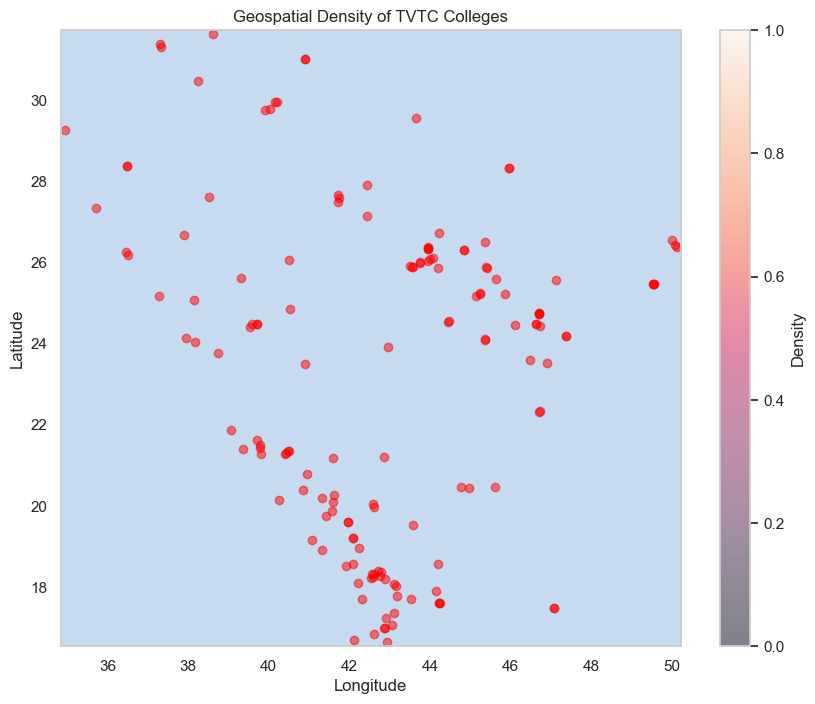

In [36]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# تحديد إحداثيات الكليات
coords = df[['latitude', 'longitude']].values

# تحديد نطاقات Kernel Density
kde = KernelDensity(bandwidth=0.1)  # حدد حجم النطاق
kde.fit(coords)

# إنشاء شبكة من النقاط لتقييم الكثافة عليها
x = np.linspace(df['longitude'].min() - 0.1, df['longitude'].max() + 0.1, 100)
y = np.linspace(df['latitude'].min() - 0.1, df['latitude'].max() + 0.1, 100)
xx, yy = np.meshgrid(x, y)
grid_coords = np.vstack([xx.ravel(), yy.ravel()]).T

# حساب الكثافة
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(xx.shape)

# رسم الكثافة على خريطة
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, density, cmap='Blues', levels=20)
plt.scatter(df['longitude'], df['latitude'], color='red', marker='o', alpha=0.5, label='Colleges')
plt.colorbar(label='Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Density of TVTC Colleges')
plt.show()


In [37]:
import folium

# إنشاء خريطة تفاعلية تركز على متوسط الإحداثيات
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# إضافة كل كلية على الخريطة
for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f"كلية {index}").add_to(m)

# حفظ الخريطة كملف HTML لعرضه في المتصفح
m.save('tvtc_colleges_map.html')


graduate / enrolled tables clean up

In [38]:
import pandas as pd

# Load the graduates data (خريجون)
df_grads = pd.DataFrame({
    'المنشأة التدريبية': ['الكليات التقنية', 'الكليات التقنية'],
    'المنطقة': ['عسير', 'عسير'],
    'نوع التدريب': ['دبلوم الكليات التقنية', 'بكالوريوس الكليات التقنية'],
    'عدد الخريجون لعام 2024': [6282, 1109]
})

# Load the enrollment data (المقيدون)
df_enrollments = pd.DataFrame({
    'المنشأة التدريبية': ['الكليات التقنية', 'الكليات التقنية'],
    'المنطقة': ['منطقة عسير', 'منطقة عسير'],
    'نوع التدريب': ['دبلوم الكليات التقنية', 'بكالوريوس الكليات التقنية'],
    'عدد المقيدون لعام 2024': [28149, 1238]
})

# Strip any leading/trailing spaces from column names to ensure clean merging
df_grads.columns = df_grads.columns.str.strip()
df_enrollments.columns = df_enrollments.columns.str.strip()

# Clean the 'المنطقة' column to ensure matching regions for the merge
df_enrollments['المنطقة'] = df_enrollments['المنطقة'].str.replace('منطقة ', '', regex=False)

# Merge the datasets on 'المنشأة التدريبية', 'المنطقة', and 'نوع التدريب'
df_merged = pd.merge(df_grads, df_enrollments, on=['المنشأة التدريبية', 'المنطقة', 'نوع التدريب'], how='inner')

# Calculate the graduation rate (خريجون/مقيدون)
df_merged['معدل التخرج'] = df_merged['عدد الخريجون لعام 2024'] / df_merged['عدد المقيدون لعام 2024']

# View the resulting dataset
print(df_merged)


  المنشأة التدريبية المنطقة                نوع التدريب  \
0   الكليات التقنية    عسير      دبلوم الكليات التقنية   
1   الكليات التقنية    عسير  بكالوريوس الكليات التقنية   

   عدد الخريجون لعام 2024  عدد المقيدون لعام 2024  معدل التخرج  
0                    6282                   28149      0.22317  
1                    1109                    1238      0.89580  


C:\Users\itman\AppData\Local\Temp\ipykernel_892\1761979245.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='نوع التدريب', y='معدل التخرج', data=df_merged, palette='viridis')


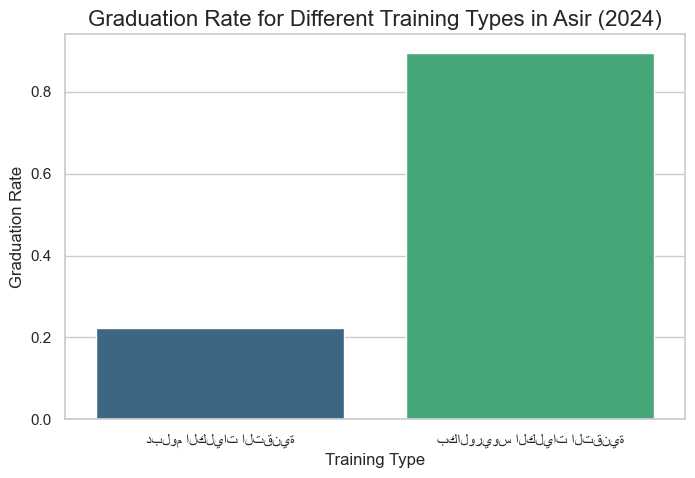

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# Plotting the graduation rate for each training type (دبلوم vs بكالوريوس)
plt.figure(figsize=(8, 5))
sns.barplot(x='نوع التدريب', y='معدل التخرج', data=df_merged, palette='viridis')

# Adding titles and labels
plt.title('Graduation Rate for Different Training Types in Asir (2024)', fontsize=16)
plt.xlabel('Training Type', fontsize=12)
plt.ylabel('Graduation Rate', fontsize=12)
plt.show()
